## **Importing Libraries**

In [76]:
# General Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm
from matplotlib import rcParams
plt.style.use('ggplot')

# Machine Learnings Libraries
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
from nltk.tokenize import RegexpTokenizer



## **Loading Dataset**

In [77]:
#Loading dataset
df = pd.read_csv('../data_file/tweet_sentiments.csv', encoding='ISO-8859-1')

#Display The first five columns of the dataset
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## **Exploratory Data Analysis**

In [78]:
#Checking the shape of the  dataset
df.shape

(9093, 3)

The shape of our dataset, (9093, 3), which indicates that we have 9,093 rows and 3 columns. Here's a breakdown of what each dimension typically represents in this context:

Rows (9093): This is the number of tweets in our dataset, meaning we have 9,093 individual tweets to analyze.

Columns (3): This likely represents:

**tweet_text:** The text content of the tweet.

**emotion_in_tweet_is_directed_at:** The specific brand or product that the emotion in the tweet is directed towards.

**is_there_an_emotion_directed_at_a_brand_or_product:** The sentiment or emotion expressed in relation to the brand or product (e.g., positive or negative).

In [79]:
df.info

<bound method DataFrame.info of                                              tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                

In [80]:
# Check for any missing values 
df.isnull().sum()


tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [99]:
# Check which entry is missing in tweet_text
missing_tweet = df[df['tweet_text'].isnull()]
print("Missing tweet text:")
print(missing_tweet)

# Analyze the distribution of emotions directed at brands/products
emotion_counts = df['emotion_in_tweet_is_directed_at'].isnull().sum()
print(f"Number of missing emotions directed at a brand or product: {emotion_counts}")

# Check the distribution of values in the sentiment column
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
print("Distribution of sentiment toward brand or product:")
print(sentiment_counts)
df.info()

Missing tweet text:
  tweet_text emotion_in_tweet_is_directed_at  \
6        NaN                             NaN   

  is_there_an_emotion_directed_at_a_brand_or_product  
6                 No emotion toward brand or product  
Number of missing emotions directed at a brand or product: 5802
Distribution of sentiment toward brand or product:
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-nul

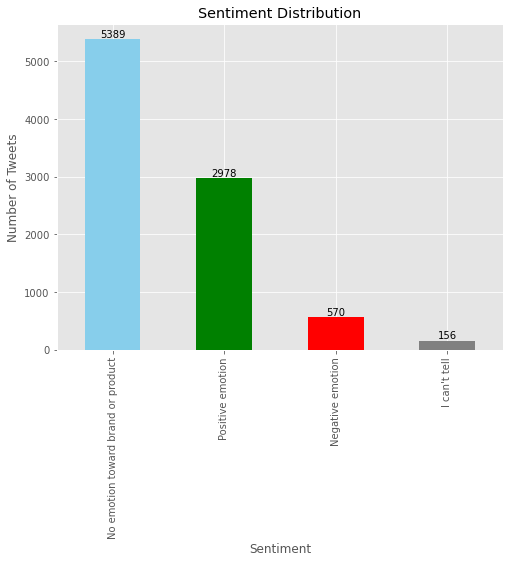

In [100]:
# Check the distribution of the sentiment
sentiment_distribution = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
ax = sentiment_distribution.plot(kind='bar', color=['skyblue', 'green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


**Sentiment Toward Brand or Product (is_there_an_emotion_directed_at_a_brand_or_product)**

The distribution is:

5389 entries show no emotion toward a brand or product.

2978 entries show positive emotion.

570 entries show negative emotion.

156 entries have the value "I can't tell.

**Missing Tweet Text**

The cleaned dataset now has 9092 rows, with no missing entries in the tweet_text column. This means that our original dataset contained 9093 rows, but after removing the rows with missing tweet_text, we were left with 9092 rows. This is a small reduction in the number of rows, but it is a necessary step to ensure that we have a complete dataset for analysis.



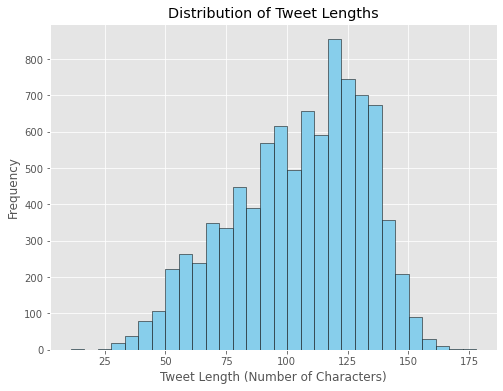

In [101]:
# Analyze the text length by calculating the number of characters in each tweet
tweet_lengths = df['tweet_text'].str.len()

# Plot the distribution of tweet lengths
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

In [103]:
# Clean the tweet_text by dropping rows with missing text values
df_cleaned = df.dropna(subset=['tweet_text'])

# Tokenize the cleaned tweets by sentiment
positive_tweets = df_cleaned[df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['tweet_text'].str.split()
negative_tweets = df_cleaned[df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['tweet_text'].str.split()
neutral_tweets = df_cleaned[df_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']['tweet_text'].str.split()

# Flatten the tokenized tweets into a single list per sentiment
positive_words = [word.lower() for tweet in positive_tweets for word in tweet if word]
negative_words = [word.lower() for tweet in negative_tweets for word in tweet if word]
neutral_words = [word.lower() for tweet in neutral_tweets for word in tweet if word]

# Count the most common words in each sentiment
positive_common_words = Counter(positive_words).most_common(10)
negative_common_words = Counter(negative_words).most_common(10)
neutral_common_words = Counter(neutral_words).most_common(10)

positive_common_words, negative_common_words, neutral_common_words

([('#sxsw', 2506),
  ('@mention', 2062),
  ('the', 1578),
  ('{link}', 1202),
  ('to', 1146),
  ('at', 999),
  ('rt', 913),
  ('for', 904),
  ('ipad', 793),
  ('a', 777)],
 [('#sxsw', 512),
  ('the', 300),
  ('@mention', 292),
  ('to', 255),
  ('is', 159),
  ('a', 151),
  ('ipad', 140),
  ('at', 137),
  ('rt', 137),
  ('of', 131)],
 [('#sxsw', 4680),
  ('@mention', 4249),
  ('{link}', 2904),
  ('the', 2409),
  ('to', 2112),
  ('at', 1868),
  ('rt', 1814),
  ('for', 1474),
  ('a', 1281),
  ('google', 1187)])

## **Text Preprocessing**

To prepare the tweet text for analysis, we'll remove unnecessary elements such as punctuation, stopwords, and special characters. We'll also convert all text to lowercase and perform tokenization. This step will make the text suitable for feeding into a machine learning model.

In [113]:
# Drop rows with missing 'tweet_text' and the unnecessary 'emotion_in_tweet_is_directed_at' column
df_cleaned = df_cleaned.dropna(subset=['tweet_text']).drop(columns=['emotion_in_tweet_is_directed_at'])

# Rename the 'is_there_an_emotion_directed_at_a_brand_or_product' column to 'sentiment'
df_cleaned = df_cleaned.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})

# Remove rows where 'sentiment' column has "I can't tell"
df_cleaned = df_cleaned[df_cleaned['sentiment'] != "I can't tell"]

# Rename 'No emotion toward brand or product' to 'Neutral emotion'
df_cleaned['sentiment'] = df_cleaned['sentiment'].replace("No emotion toward brand or product", "Neutral emotion")

# Display the first few rows of the cleaned dataset
df_cleaned.head()

,tweet_text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [114]:
# Define a function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the preprocessing function to the 'text' column
df_cleaned['processed_text'] = df_cleaned['tweet_text'].apply(preprocess_text)

# Display the cleaned text data
df_cleaned[['tweet_text', 'processed_text']].head()


,tweet_text,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hrs tweeting riseaustin dead need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...


**Cleaning and Removing Punctuation**

In [116]:
english_punctuation = string.punctuation
punctuation_list = english_punctuation
def cleaning_punctuation(text):
  translator = str.maketrans('', '', punctuation_list)
  return text.translate(translator)

In [117]:
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(lambda x: cleaning_punctuation(x))
df_cleaned["tweet_text"].head()

0    wesley83 I have a 3G iPhone After 3 hrs tweeti...
1    jessedee Know about fludapp  Awesome iPadiPhon...
2    swonderlin Can not wait for iPad 2 also They s...
3    sxsw I hope this years festival isnt as crashy...
4    sxtxstate great stuff on Fri SXSW Marissa Maye...
Name: tweet_text, dtype: object

**Removing Numeric Values**

In [118]:
def cleaning_numbers(text):
  return re.sub('[0-9]+', '', text)
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(lambda x: cleaning_numbers(x))
df_cleaned["tweet_text"].head()

0    wesley I have a G iPhone After  hrs tweeting a...
1    jessedee Know about fludapp  Awesome iPadiPhon...
2    swonderlin Can not wait for iPad  also They sh...
3    sxsw I hope this years festival isnt as crashy...
4    sxtxstate great stuff on Fri SXSW Marissa Maye...
Name: tweet_text, dtype: object

**Getting Tokenization Of Tweet Text**

In [119]:
tokenizer = RegexpTokenizer(r'\w+') # this match one or more words, digits, underscores
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(tokenizer.tokenize)
df_cleaned['tweet_text'].head(2)

0    [wesley, I, have, a, G, iPhone, After, hrs, tw...
1    [jessedee, Know, about, fludapp, Awesome, iPad...
Name: tweet_text, dtype: object

**Applyig Stemming**

In [120]:
st = nltk.PorterStemmer()

def stemming_on_text(data):
  text = [st.stem(word) for word in data]
  return text
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(lambda x: stemming_on_text(x))
df_cleaned['tweet_text'].head()

0    [wesley, I, have, a, G, iphon, after, hr, twee...
1    [jessede, know, about, fludapp, awesom, ipadip...
2    [swonderlin, can, not, wait, for, ipad, also, ...
3    [sxsw, I, hope, thi, year, festiv, isnt, as, c...
4    [sxtxstate, great, stuff, on, fri, sxsw, maris...
Name: tweet_text, dtype: object

**Applying Lemmatization**

In [89]:
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
  text = [lm.lemmatize(word) for word in data]
  return text

In [121]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MARY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MARY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [122]:
df_cleaned['tweet_text'] = df_cleaned['tweet_text'].apply(lambda x: lemmatizer_on_text(x))
df_cleaned['tweet_text'].head(4)

0    [wesley, I, have, a, G, iphon, after, hr, twee...
1    [jessede, know, about, fludapp, awesom, ipadip...
2    [swonderlin, can, not, wait, for, ipad, also, ...
3    [sxsw, I, hope, thi, year, festiv, isnt, a, cr...
Name: tweet_text, dtype: object

 ## **Vectorizing the processed_text using TF-IDF** 

Step 1: TF-IDF Vectorization

We’ll use TfidfVectorizer from sklearn to transform the processed_text.

Step 2: Train-Test Split

We’ll split the data into training and testing sets after vectorizing.

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


X = df_cleaned['processed_text']  # Feature: processed tweet text
y = df_cleaned['sentiment']       # Target: sentiment labels

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  
# Fit and transform the processed text into TF-IDF features
X_tfidf = tfidf.fit_transform(X)

# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Display shape of training and testing data
print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Training data size: (7148, 5000)
Test data size: (1788, 5000)


## **Model Building**

Now that we have the text data vectorized and split, we'll now  train a classification model such as Logistic Regression,  or Random Forest.

1. Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model and set random at 42
model = LogisticRegression(random_state=42)

# Trainining our  model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model performance
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Negative emotion       0.55      0.05      0.09       126
 Neutral emotion       0.70      0.88      0.78      1094
Positive emotion       0.63      0.46      0.53       568

        accuracy                           0.69      1788
       macro avg       0.63      0.46      0.47      1788
    weighted avg       0.67      0.69      0.65      1788

